<a href="https://colab.research.google.com/github/RCaminero/image-classification/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
import tensorflow as tf
import keras.utils as kr
import numpy as np
from keras.preprocessing.image import ImageDataGenerator # Nos permite generar lotes de datos de imágenes de tensor con aumento de datos en tiempo real.

In [ ]:
from google.colab import drive # Lo usamos para trabajar con archivos que tenemos en drive
drive.mount('/content/drive')

Mounted at /content/drive


# **GENERANDO LOTES DE IMÁGENES**

Aquí generamos el lote de datos (`rescale = 1./255`) con una escala de 0.255 a 1 (rescale) para que todas las imágenes posean la misma escala para que hayan menos pérdidas en el entrenamiento. Colocamos la intensidad de corte a un 20%  para los ángulos de percepción (`shear_range = 0.2`),como por ejemplo esta imagen:


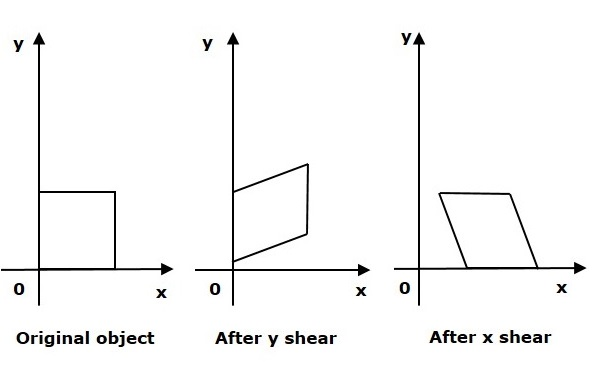

Colocamos también un zoom al 20% (`zoom_range = 0.2`) para poder a parte de ver las imágenes en distinos ángulos, también cuando está cerca y lejos. Y por último, colocamos el (`horizontal_flip = True`) que permite girar la imagen de forma aleatoria y horizontal.



In [ ]:
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True) 
train_ds = train_ds.flow_from_directory('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE/Kaggle/training_set/training_set', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary') # class_mode convierte en una matriz numpy 1D de etiquetas binarias

Found 8008 images belonging to 2 classes.


In [ ]:
test_ds = ImageDataGenerator(rescale = 1./255)
test_ds = test_ds.flow_from_directory('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE/Kaggle/test_set/test_set', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 2023 images belonging to 2 classes.


# **CREAMOS NUESTRO MODELO Y LE AGREGAMOS LAS CAPAS QUE UTILIZAREMOS**

Utilizamos `Conv2D` para crear un núcleo de convolución que se convoluciona con la entrada de la capa para producir un conjunto de salidas. Le decimos que tendrá 32 filtros de salida en la convolución (`filters=32`), un tamano de altura y anchura de 3 (`kernel_size=3`), usamos la activación RELU  (`activation='relu'`) que transforma los valores introducidos anulando los valores negativos y dejando los positivos tal y como entran y por último colocamos para qué tamano de imágenes será la capa (`input_shape=[64, 64, 3]`), en este caso RGB 64X64.

`MaxPool2D` nos ayuda reducir la muestra de la entrada a lo largo de sus dimensiones (alto y ancho) tomando el valor máximo sobre una ventana de entrada (de tamaño definido por `pool_size`). La zancada (`strides=2`) nos especifica cuánto se mueve la ventana de agrupación para cada paso de agrupación.

Flatten nos ayuda convirtiendo la matriz en una sola matriz en una sola, es decir, aplanándola como lo indica su nombre. La `activación='sigmoid'` devuelve un valor cercano a cero, y para valores grandes (>5) el resultado de la función se acerca a 1.

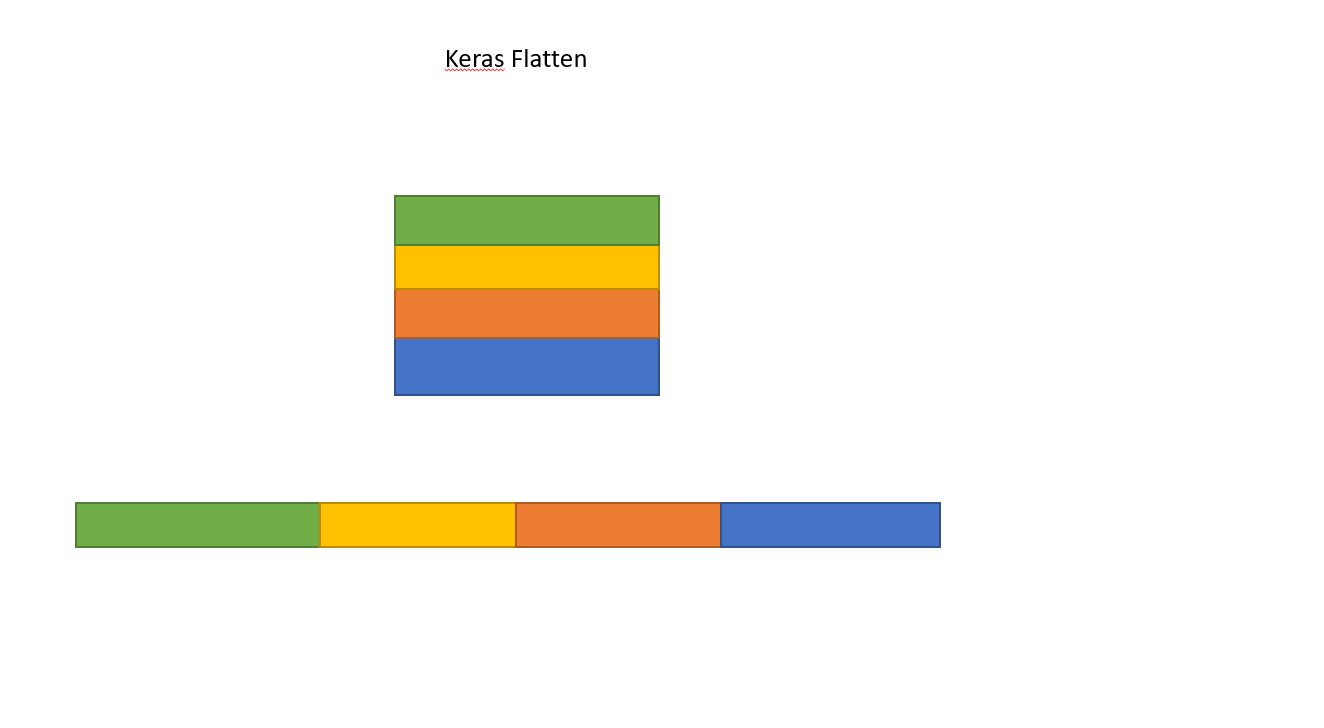

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [ ]:
model.add(tf.keras.layers.Flatten()) 

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_ds, validation_data=test_ds, epochs=5)

Epoch 1/35
251/251 [==============================] - 92s 365ms/step - loss: 0.6774 - accuracy: 0.5792 - val_loss: 0.6384 - val_accuracy: 0.6149
Epoch 2/35
251/251 [==============================] - 88s 349ms/step - loss: 0.6110 - accuracy: 0.6688 - val_loss: 0.5826 - val_accuracy: 0.7054
Epoch 3/35
251/251 [==============================] - 88s 349ms/step - loss: 0.5628 - accuracy: 0.7110 - val_loss: 0.5227 - val_accuracy: 0.7489
Epoch 4/35
251/251 [==============================] - 88s 349ms/step - loss: 0.5361 - accuracy: 0.7348 - val_loss: 0.5487 - val_accuracy: 0.7301
Epoch 5/35
251/251 [==============================] - 85s 340ms/step - loss: 0.5116 - accuracy: 0.7456 - val_loss: 0.5025 - val_accuracy: 0.7598
Epoch 6/35
251/251 [==============================] - 86s 341ms/step - loss: 0.4923 - accuracy: 0.7574 - val_loss: 0.5060 - val_accuracy: 0.7563
Epoch 7/35
251/251 [==============================] - 86s 344ms/step - loss: 0.4836 - accuracy: 0.7670 - val_loss: 0.4960 - val_ac

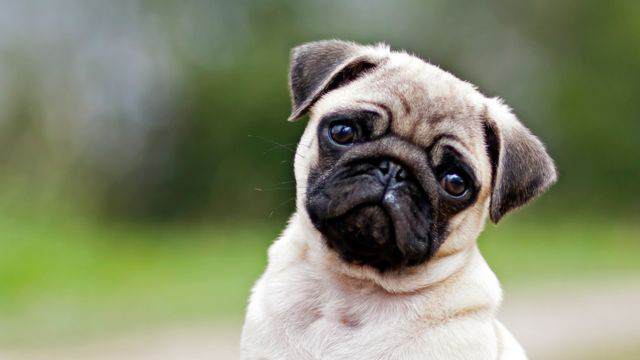

In [ ]:
kr.load_img('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE/perroprueba.jpg')

In [ ]:
test_img = kr.load_img('/content/drive/MyDrive/ARTIFICIAL INTELLIGENCE/perroprueba.jpg', target_size = (64, 64))
img = kr.img_to_array(test_img) # convertir una imagen cargada en formato PIL en una matriz NumPy
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
#train_ds.class_indices
#print(train_ds.class_indices)
if r[0][0] == 1:
    pred = 'perro'
else:
    pred = 'gato'

#print(model.predict(img))
print(f"Es un {pred}")

1/1 [==============================] - 0s 14ms/step
Es un perro


In [ ]:
# Para evaluar la precisión del modelo
test_eval = model.evaluate(train_ds, verbose=1)

print('Pérdidas:', test_eval[0])
print('Precisión:',  (round((test_eval[1]),4)*100),'%')